<a href="https://colab.research.google.com/github/Saranyanv/test/blob/master/455_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Source: https://catalog.data.gov/dataset/air-traffic-passenger-statistics

In [0]:
import os 
import numpy as np
import zipfile
from tqdm import tqdm
from matplotlib import pyplot as plt
from pandas import DataFrame
import pandas as pd
import seaborn as sns
import io
RANDOM_SEED = 42

In [48]:
#boston_input = pd.read_csv('C:\\Users\\Saranyan\\Dropbox\\MSPA\\Practical Machine Learning\\Week3\\jump-start-boston-housing-v001\\jump-start-boston-housing-v001\\boston.csv', header=0)

from google.colab import files
uploaded = files.upload()

Saving Air_Traffic_Passenger_Statistics.csv to Air_Traffic_Passenger_Statistics (4).csv


In [0]:
sfo_air_traffic = pd.read_csv(io.StringIO(uploaded['Air_Traffic_Passenger_Statistics.csv'].decode('utf-8')), sep = ',')

In [50]:
sfo_air_traffic.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,201812,ABC Aerolineas S.A. de C.V. dba Interjet,4O,ABC Aerolineas S.A. de C.V. dba Interjet,4O,International,Mexico,Deplaned,Other,International,A,5179
1,201812,Volaris Airlines,Y4,Volaris Airlines,Y4,International,Mexico,Enplaned,Low Fare,International,A,2791
2,201812,Volaris Airlines,Y4,Volaris Airlines,Y4,International,Mexico,Deplaned,Low Fare,International,A,2111
3,201812,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Enplaned,Other,International,A,11359
4,201812,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,10645


In [51]:
sfo_air_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19815 entries, 0 to 19814
Data columns (total 12 columns):
Activity Period                19815 non-null int64
Operating Airline              19815 non-null object
Operating Airline IATA Code    19752 non-null object
Published Airline              19815 non-null object
Published Airline IATA Code    19752 non-null object
GEO Summary                    19815 non-null object
GEO Region                     19815 non-null object
Activity Type Code             19815 non-null object
Price Category Code            19815 non-null object
Terminal                       19815 non-null object
Boarding Area                  19815 non-null object
Passenger Count                19815 non-null int64
dtypes: int64(2), object(10)
memory usage: 1.8+ MB


In [52]:
print('Shape of the SFO Passenger Traffic DataFrame: Rows, Columns')
sfo_air_traffic.shape

Shape of the SFO Passenger Traffic DataFrame: Rows, Columns


(19815, 12)

In [53]:
print('Descriptive statistics of the SFO Passenger Traffic DataFrame:')
print(sfo_air_traffic.describe())

Descriptive statistics of the SFO Passenger Traffic DataFrame:
       Activity Period  Passenger Count
count     19815.000000     19815.000000
mean     201208.862125     29980.150694
std         399.483206     61411.417938
min      200507.000000         1.000000
25%      200901.000000      5327.000000
50%      201208.000000      9158.000000
75%      201602.000000     20545.000000
max      201812.000000    659837.000000


In [0]:
sfo_EK_Enplane_air_traffic = sfo_air_traffic.loc[(sfo_air_traffic['Published Airline IATA Code'].isin(['EK', 'BA'])) & (sfo_air_traffic['Activity Period'] >= 201400) & (sfo_air_traffic['Activity Type Code'] == 'Enplaned')]

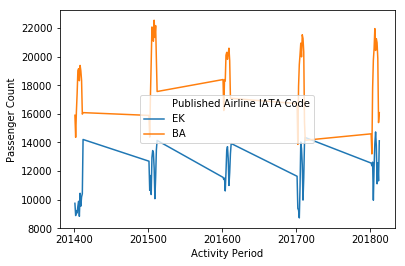

In [79]:
ax = sns.lineplot(x="Activity Period", y="Passenger Count", hue="Published Airline IATA Code",data=sfo_EK_Enplane_air_traffic)

In [77]:
sfo_air_traffic.loc[(sfo_air_traffic['Published Airline IATA Code'].isin(['EK', 'BA'])) & (sfo_air_traffic['Activity Period'] >= 201400) & (sfo_air_traffic['Activity Type Code'] == 'Enplaned')]

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
94,201812,Emirates,EK,Emirates,EK,International,Middle East,Enplaned,Other,International,A,14114
116,201812,British Airways,BA,British Airways,BA,International,Europe,Enplaned,Other,International,A,16083
245,201811,Emirates,EK,Emirates,EK,International,Middle East,Enplaned,Other,International,A,11312
268,201811,British Airways,BA,British Airways,BA,International,Europe,Enplaned,Other,International,A,15386
403,201810,Emirates,EK,Emirates,EK,International,Middle East,Enplaned,Other,International,A,12585
423,201810,British Airways,BA,British Airways,BA,International,Europe,Enplaned,Other,International,A,19888
557,201809,Emirates,EK,Emirates,EK,International,Middle East,Enplaned,Other,International,A,11108
577,201809,British Airways,BA,British Airways,BA,International,Europe,Enplaned,Other,International,A,20978
715,201808,Emirates,EK,Emirates,EK,International,Middle East,Enplaned,Other,International,A,13791
736,201808,British Airways,BA,British Airways,BA,International,Europe,Enplaned,Other,International,A,21255
